### Bike Sharing Assignment

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

#### Reading and Understanding Data

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the Dataset
boombikes = pd.read_csv("day.csv")

In [3]:
#Analysing the Dataset
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
boombikes.shape

(730, 16)

In [5]:
#inspecting the Dataset
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


##### There is no missing value and hence no need for imputations.

In [6]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Visualizing the Data

In [7]:
# importing visualizing libraries
import matplotlib.pyplot as plt
import seaborn as sns

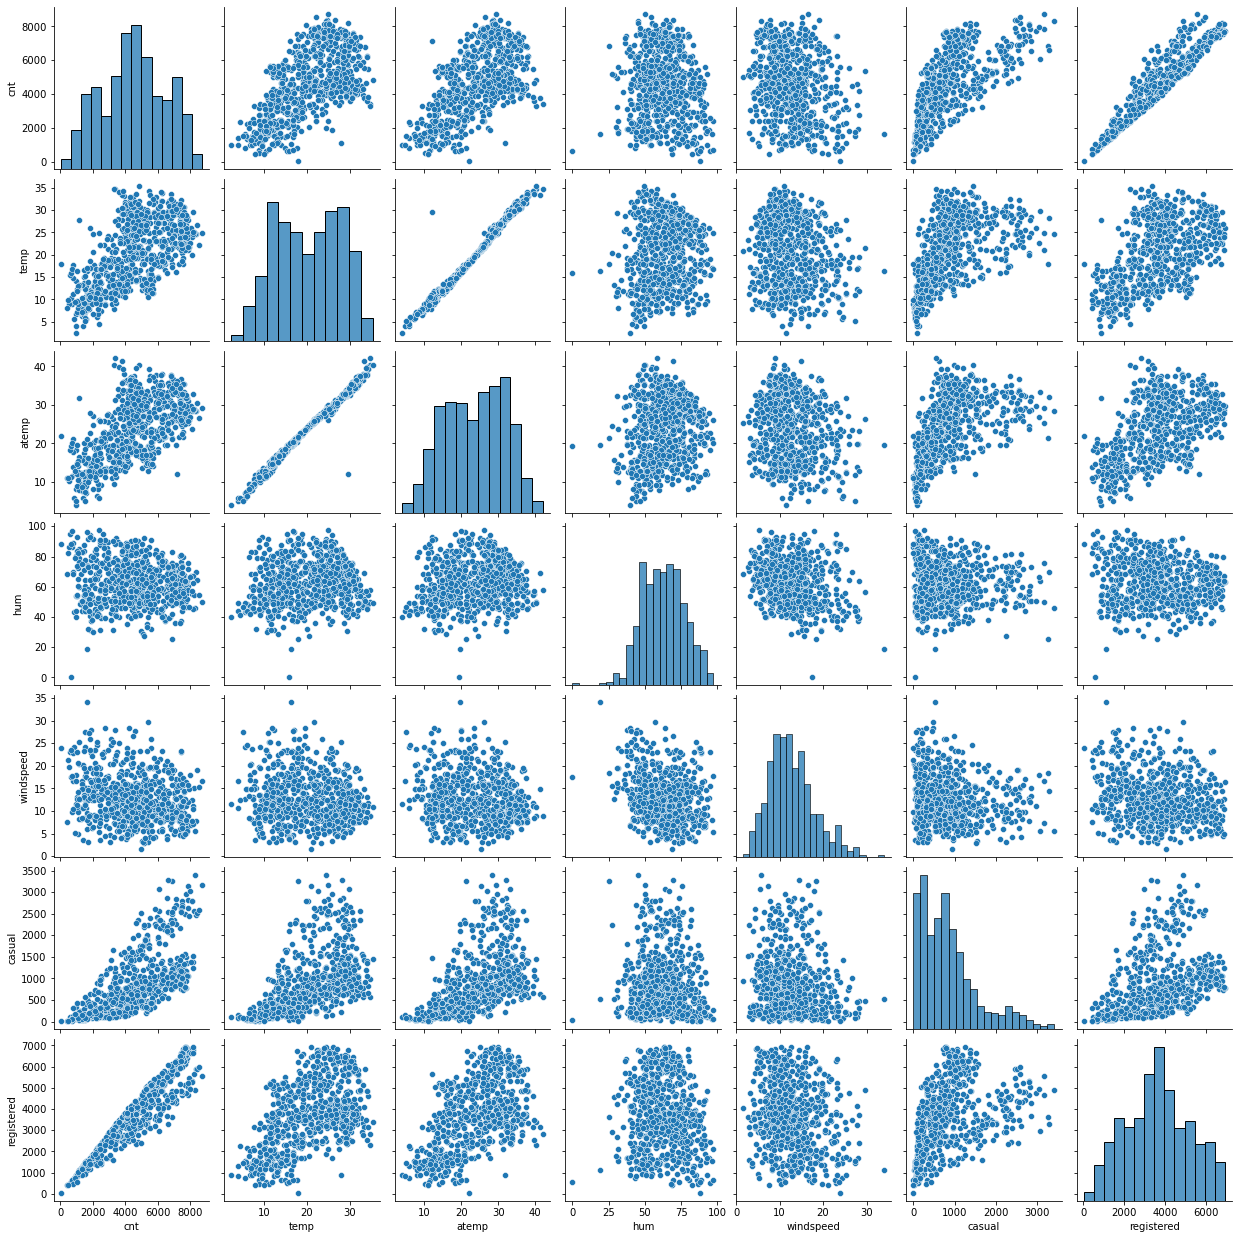

In [8]:
# pairplot analysis for numeric variables
vars=['cnt','temp','atemp','hum','windspeed','casual','registered']
sns.pairplot(boombikes[vars])
plt.show()

It is observed that, variables like registered, temp, atemp have clear correlaion with target('cnt') variable.

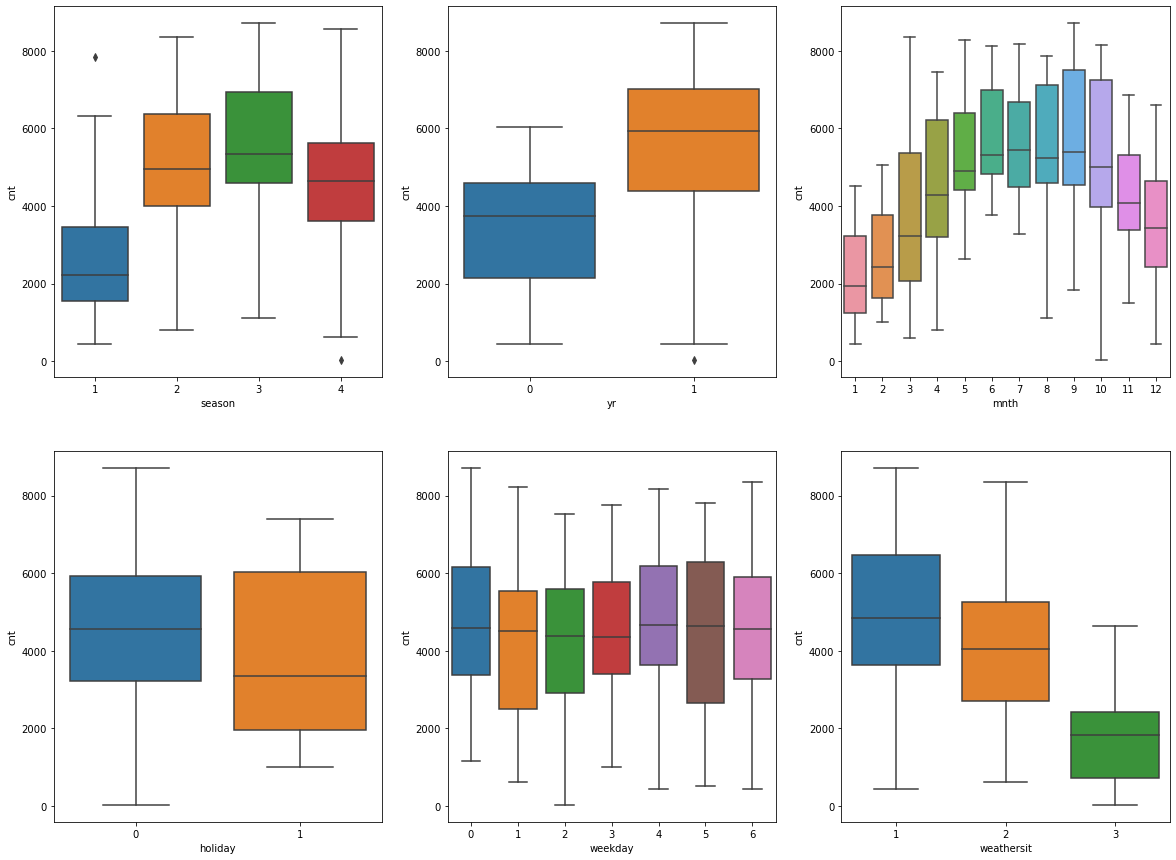

In [9]:
# boxplot analysis for categorical variables
plt.figure(figsize=[20,15])
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=boombikes)
plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=boombikes)
plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=boombikes)
plt.subplot(2,3,4)
sns.boxplot(x='holiday',y='cnt',data=boombikes)
plt.subplot(2,3,5)
sns.boxplot(x='weekday',y='cnt',data=boombikes)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=boombikes)
plt.show()

1. The count of total rental bikes is highest during season 'Fall' and is relatively very low during 'Spring'.
2. The overall business is increasing. i.e, it is higher in 2019 than 2018.
3. The month column shows the trend similar to the Season trend.
4. During holidays, the users are a bit less than that of during normal days.
5. Business is a bit low during mid weekdays, Tuesday and Wednesday comparitively to other days.
6. The count of total rental bikes is high when the weather is clearer and is very low when there is Light snow or heavy rain.

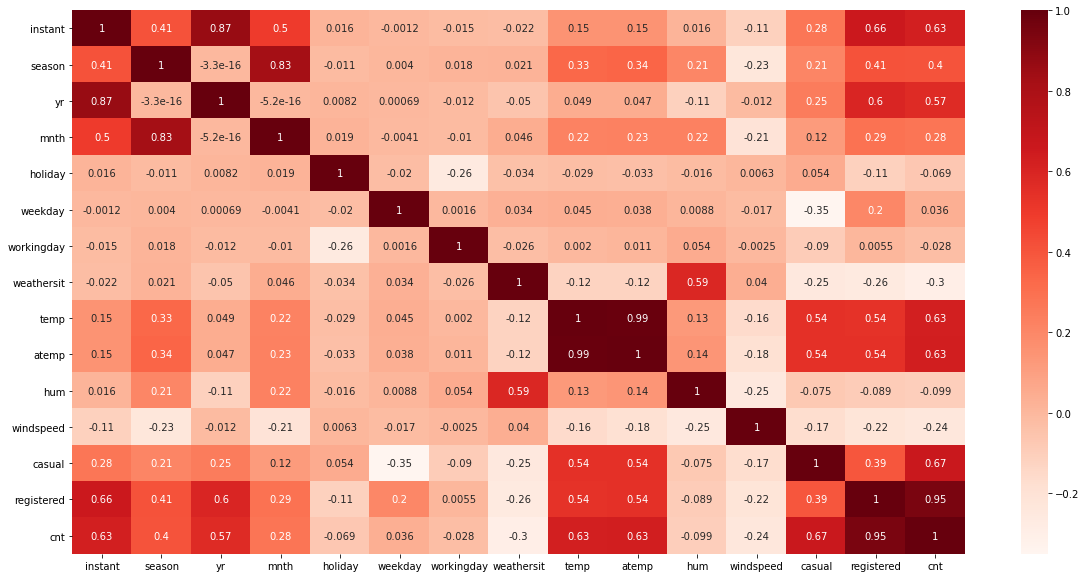

In [10]:
# Analysing the correlation among the variables
plt.figure(figsize=[20,10])
sns.heatmap(boombikes.corr(),annot=True,cmap='Reds')
plt.show()

So, it is evident from the heatmap that variables registered, casual, temp, atemp, instant have the highest correlation with the Target Variable cnt.

##### Creation of Dummy Variables

Variables such as season, months, weekday, weathersit contains multiple levels.
So first we need to convert them to categorical and then create dummy variables for the same.

In [11]:
# For variable season (Converting to categorical)
boombikes.season = boombikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
boombikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
# For variable season (Creating Dummy Variable)
season = pd.get_dummies(boombikes.season, drop_first=True) #Dropping the first variable to get n-1 levels.

In [13]:
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [14]:
# Adding the results to the original boombikes dataframe
boombikes = pd.concat([boombikes, season], axis = 1)
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [15]:
# Similarly for months
boombikes.mnth = boombikes.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
boombikes.mnth.value_counts()

mar    62
jan    62
jul    62
oct    62
may    62
aug    62
dec    62
sep    60
nov    60
jun    60
apr    60
feb    56
Name: mnth, dtype: int64

In [16]:
mnth = pd.get_dummies(boombikes.mnth, drop_first=True)
mnth.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [17]:
boombikes = pd.concat([boombikes, mnth], axis = 1)
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1,01-01-2018,spring,0,jan,0,1,1,2,14.110847,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,spring,0,jan,0,2,1,2,14.902598,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,spring,0,jan,0,3,1,1,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,spring,0,jan,0,4,1,1,8.200000,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,spring,0,jan,0,5,1,1,9.305237,...,0,0,1,0,0,0,0,0,0,0


In [18]:
# For weekday
boombikes.weekday = boombikes.weekday.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})
boombikes.weekday.value_counts()

tue    105
mon    105
wed    104
sun    104
sat    104
thu    104
fri    104
Name: weekday, dtype: int64

In [19]:
weekday = pd.get_dummies(boombikes.weekday, drop_first=True)
weekday.head()

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [20]:
boombikes = pd.concat([boombikes, weekday], axis = 1)
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,1,01-01-2018,spring,0,jan,0,mon,1,2,14.110847,...,0,0,0,0,1,0,0,0,0,0
1,2,02-01-2018,spring,0,jan,0,tue,1,2,14.902598,...,0,0,0,0,0,0,0,0,1,0
2,3,03-01-2018,spring,0,jan,0,wed,1,1,8.050924,...,0,0,0,0,0,0,0,0,0,1
3,4,04-01-2018,spring,0,jan,0,thu,1,1,8.200000,...,0,0,0,0,0,0,0,1,0,0
4,5,05-01-2018,spring,0,jan,0,fri,1,1,9.305237,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Same way for weathersit
boombikes.weathersit = boombikes.weathersit.map({1:'clear', 2:'misty', 3:'cloudy', 4:'rainy'})
boombikes.weathersit.value_counts()

clear     463
misty     246
cloudy     21
Name: weathersit, dtype: int64

In [22]:
# Since there is no record for rainy weathersit, we can ignore that and consider only 3 levels and can create only 2 dummy variables
weathersit = pd.get_dummies(boombikes.weathersit, drop_first=True)
weathersit.head()

,cloudy,misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [23]:
boombikes = pd.concat([boombikes, weathersit], axis = 1)
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,misty
0,1,01-01-2018,spring,0,jan,0,mon,1,misty,14.110847,...,0,0,1,0,0,0,0,0,0,1
1,2,02-01-2018,spring,0,jan,0,tue,1,misty,14.902598,...,0,0,0,0,0,0,1,0,0,1
2,3,03-01-2018,spring,0,jan,0,wed,1,clear,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,spring,0,jan,0,thu,1,clear,8.200000,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,spring,0,jan,0,fri,1,clear,9.305237,...,0,0,0,0,0,0,0,0,0,0


We have created the dummy variables for the categorical variables. Now let us drop the original variables from the dataset.

In [24]:
# Dropping the categorical variables for which we have created the dummy variables
boombikes.drop(columns=['season','mnth','weekday','weathersit'], inplace=True)

In [25]:
# Dropping the variables which are irrelevant variables instant and dteday
boombikes.drop(columns=['instant','dteday'], inplace=True)

In the dataset,we have casual and registered variables which are directly contribute to the increase in bike user's count.
The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. So, we can drop both these since cnt is the sum of these 2 variables.

In [26]:
# Dropping the variables which are irrelevant variables instant and dteday
boombikes.drop(columns=['casual','registered'], inplace=True)

In [27]:
# Since temp and atemp columns are complement each other, we can consider only one column.
# So, Dropping 'atemp' variable since we are considering temp column.
boombikes.drop(columns=['atemp'], inplace=True)

In [28]:
# Checking the dataset after preparing the Data for Model building
boombikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,misty
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Splitting the Data into Training and Testing Data

In [29]:
# importing libraries
from sklearn.model_selection import train_test_split

In [30]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(boombikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
#Checking the shape of the datasets
df_train.shape

(510, 29)

In [32]:
df_test.shape

(219, 29)

#### Rescaling the Feature Variables

Since the columns temp, atemp, hum and windspeed have larger decimal valuescompared to others. So, we use MinMax scaling technique to rescale them.

In [33]:
# importing libraries
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
# Applying fit_transfer on train dataset
# Applying scaler() to all the columns except the binary and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,misty
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


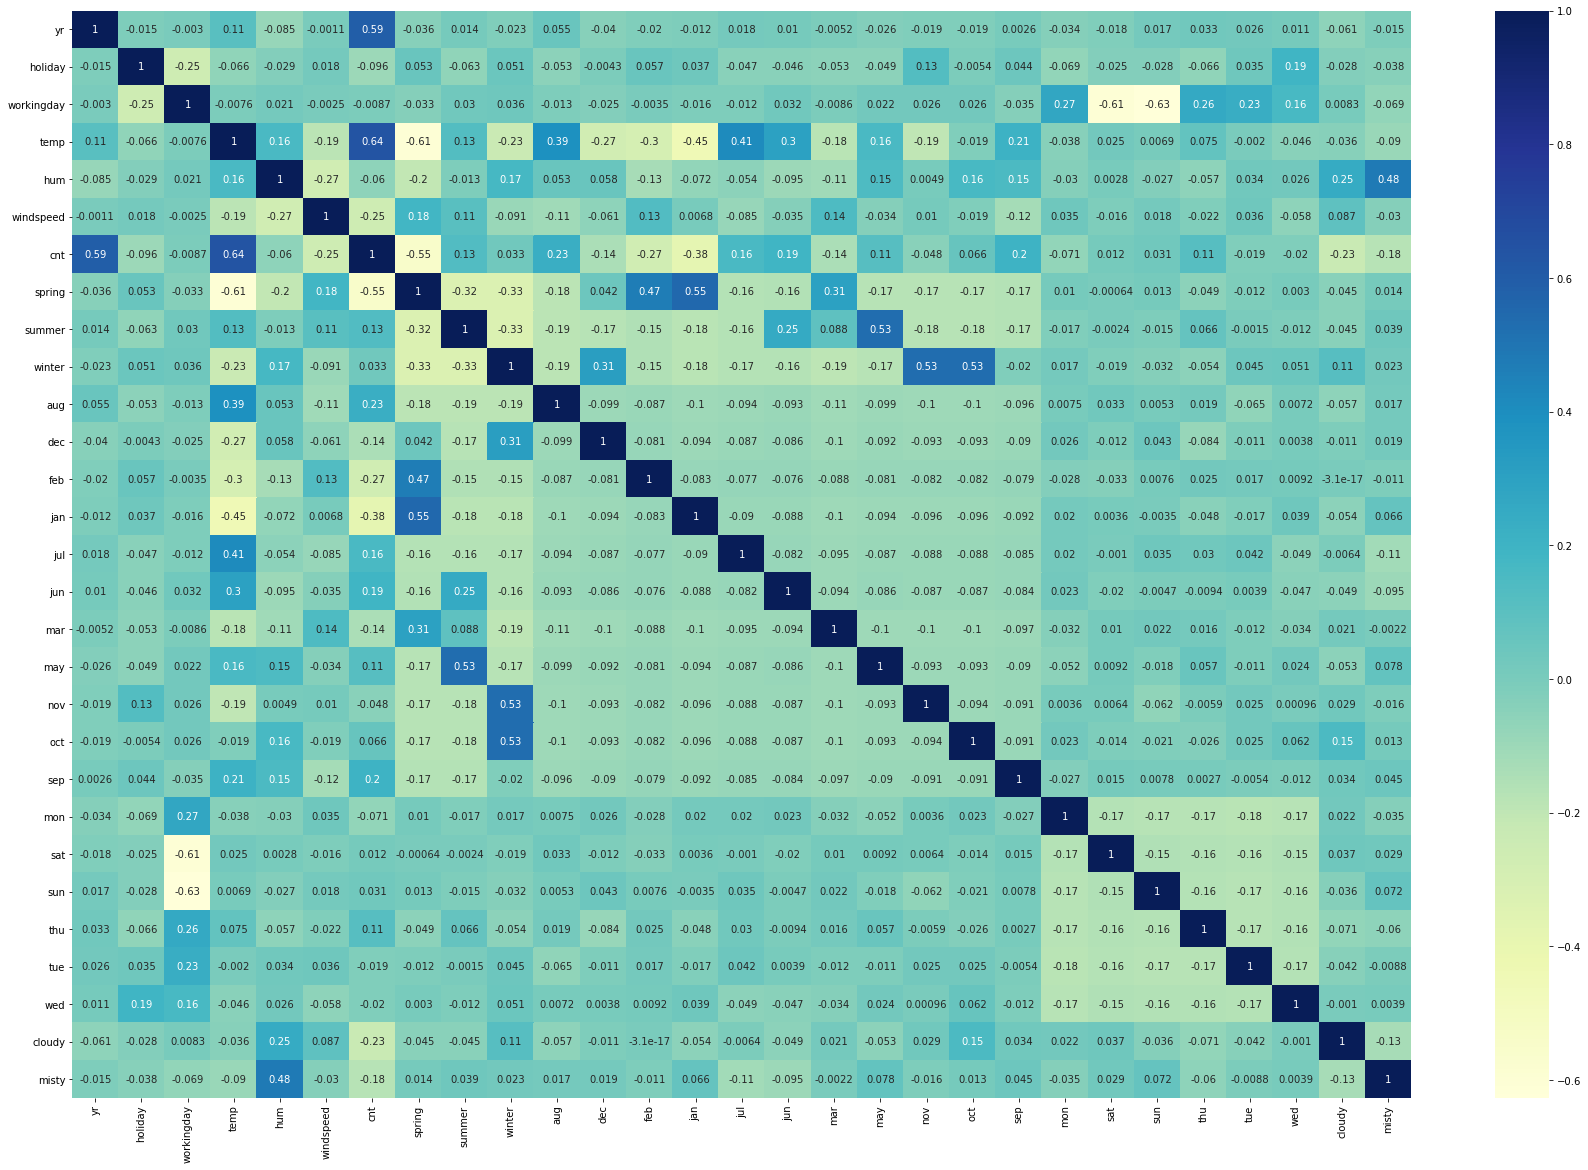

In [38]:
# Now Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

It is clear that temp variable is correlated to cnt the most.
So, we pick area as the first variable and we'll try to fit a regression line to that.

#### Dividing into X and Y sets for the Model Building

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Building a Linear Model

##### Model 1: Using a single selected variable - temp

In [40]:
#importing libraries
import statsmodels.api as sm

In [41]:
# Adding constant to training dataset and building linear model

X_train_lm = sm.add_constant(X_train['temp'])
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const    0.169798
temp     0.639952
dtype: float64

In [42]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           5.80e-61
Time:                        21:46:51   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have R squared value of just 0.414 with just one variable 'temp'. So, only 41% of the variance is explained by the temp variable. P-value for the same is zero and hence thr feature is statistically significant.

Here, beta 0(slope) is 0.639952 and beta 1(intercept) is 0.169798.

##### Using RFE to select variables

In [43]:
# importing libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)    #setting the feature limit to 15
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 9),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 6),
 ('nov', True, 1),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 12),
 ('tue', False, 7),
 ('wed', False, 10),
 ('cloudy', True, 1),
 ('misty', True, 1)]

In [46]:
# Listing the 15 selected features
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'cloudy', 'misty'],
      dtype='object')

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [48]:
# Adding constant variable to training dataset and building linear model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
lm.params

const        0.320243
yr           0.230328
holiday     -0.091228
temp         0.479977
hum         -0.160227
windspeed   -0.188457
spring      -0.061737
summer       0.040767
winter       0.103435
dec         -0.037199
jan         -0.043748
jul         -0.055495
nov         -0.040949
sep          0.074891
cloudy      -0.248116
misty       -0.055876
dtype: float64

In [49]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          3.34e-189
Time:                        21:46:52   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.000       0.249       0.391
yr             0.2303      0.008     28.511      0.000       0.214       0.246
holiday       -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp           0.4800      0.037     12.977      0.000       0.407       0.553
hum           -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed     -0.1885      0.026     -7.312      0.000      -0.239      -0.138
spring        -0.0617      0.021     -2.907      0.004      -0.103      -0.020
summer         0.0408      0.015      2.659      0.008       0.011       0.071
winter         0.1034      0.018      5.763      0.000       0.068       0.139
dec           -0.0372      0.017     -2.131      0.034      -0.071      -0.003
jan           -0.0437      0.018     -2.415      0.016      -0.079      -0.008
jul           -0.0555      0.018     -3.046      0.002      -0.091      -0.020
nov           -0.0409      0.019     -2.187      0.029      -0.078      -0.004
sep            0.0749      0.017      4.438      0.000       0.042       0.108
cloudy        -0.2481      0.026     -9.402      0.000      -0.300      -0.196
misty         -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R square value for the Model is 0.845 and adjusted R square value is 0.841. And the p-values are also very less which implies the variables are statistically significant.

Let us calculate the VIF for the model and analyse it further.

In [50]:
# importing libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# Calculating VIF for the model

X_train_rfe = X_train_rfe.drop(['const'], axis=1)   # Dropping const variable from dataframe

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,misty,2.32
0,yr,2.09
11,nov,1.83
9,jan,1.75


##### Since the VIF is very high for the 'hum' variable, let us drop this variable and check the R square value

##### Building the Model after dropping 'hum'

In [52]:
X_train_rfe.drop(columns=['hum'], inplace=True)

X_train_rfe = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_rfe).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.57e-186
Time:                        21:46:52   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.000       0.184       0.310
yr             0.2343      0.008     28.709      0.000       0.218       0.250
holiday       -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp           0.4377      0.036     12.083      0.000       0.366       0.509
windspeed     -0.1586      0.025     -6.290      0.000      -0.208      -0.109
spring        -0.0716      0.021     -3.337      0.001      -0.114      -0.029
summer         0.0333      0.015      2.148      0.032       0.003       0.064
winter         0.0887      0.018      4.951      0.000       0.053       0.124
dec           -0.0445      0.018     -2.520      0.012      -0.079      -0.010
jan           -0.0503      0.018     -2.738      0.006      -0.086      -0.014
jul           -0.0504      0.018     -2.725      0.007      -0.087      -0.014
nov           -0.0419      0.019     -2.198      0.028      -0.079      -0.004
sep            0.0682      0.017      3.992      0.000       0.035       0.102
cloudy        -0.2929      0.025    -11.908      0.000      -0.341      -0.245
misty         -0.0814      0.009     -9.359      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After dropping the variable 'hum', the R squared value is 0.840 and Adjusted R squared value is 0.835. Let us check the VIF values for the model.

In [53]:
# Calculating VIF for the model

X_train_rfe = X_train_rfe.drop(['const'], axis=1)   # Dropping const variable from dataframe

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,nov,1.80
8,jan,1.66
9,jul,1.59
13,misty,1.56


##### Since the VIF value is >5 for 'trmp' variable, let us drop that variable and build the model

In [54]:
X_train_rfe.drop(columns=['temp'], inplace=True)

X_train_rfe = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train, X_train_rfe).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          5.50e-160
Time:                        21:46:53   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5961      0.016     37.557      0.000       0.565       0.627
yr             0.2454      0.009     26.627      0.000       0.227       0.264
holiday       -0.0856      0.030     -2.896      0.004      -0.144      -0.028
windspeed     -0.1903      0.029     -6.675      0.000      -0.246      -0.134
spring        -0.2503      0.018    -14.146      0.000      -0.285      -0.216
summer        -0.0511      0.016     -3.252      0.001      -0.082      -0.020
winter        -0.0213      0.018     -1.216      0.225      -0.056       0.013
dec           -0.1100      0.019     -5.752      0.000      -0.148      -0.072
jan           -0.1202      0.020     -6.069      0.000      -0.159      -0.081
jul           -0.0186      0.021     -0.894      0.372      -0.059       0.022
nov           -0.1013      0.021     -4.847      0.000      -0.142      -0.060
sep            0.0530      0.019      2.735      0.006       0.015       0.091
cloudy        -0.3127      0.028    -11.207      0.000      -0.367      -0.258
misty         -0.0882      0.010     -8.938      0.000      -0.108      -0.069
==============================================================================
Omnibus:                       56.767   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.173
Skew:                          -0.589   Prob(JB):                     4.44e-30
Kurtosis:                       5.230   Cond. No.                         9.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Removing 'temp' variable resulted in increasing the p-value of 'jul' and 'winter' variables. So before removing any of them let us check the VIF for the model.

In [55]:
# Calculating VIF for the model

X_train_rfe = X_train_rfe.drop(['const'], axis=1)   # Dropping const variable from dataframe

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.88
3,spring,2.89
5,winter,2.84
4,summer,2.01
0,yr,1.83
9,nov,1.79
7,jan,1.64
12,misty,1.52
6,dec,1.45
8,jul,1.20


##### VIF values for the variables are good to go. But let us drop 'jul' column which is having a bit high p-value and build a model.

In [56]:
X_train_rfe.drop(columns=['jul'], inplace=True)

X_train_rfe = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train, X_train_rfe).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.0
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          6.36e-161
Time:                        21:46:53   Log-Likelihood:                 439.28
No. Observations:                 510   AIC:                            -852.6
Df Residuals:                     497   BIC:                            -797.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5892      0.014     42.571      0.000       0.562       0.616
yr             0.2455      0.009     26.644      0.000       0.227       0.264
holiday       -0.0853      0.030     -2.886      0.004      -0.143      -0.027
windspeed     -0.1902      0.029     -6.671      0.000      -0.246      -0.134
spring        -0.2437      0.016    -15.140      0.000      -0.275      -0.212
summer        -0.0445      0.014     -3.210      0.001      -0.072      -0.017
winter        -0.0155      0.016     -0.951      0.342      -0.047       0.016
dec           -0.1094      0.019     -5.727      0.000      -0.147      -0.072
jan           -0.1202      0.020     -6.070      0.000      -0.159      -0.081
nov           -0.1006      0.021     -4.814      0.000      -0.142      -0.060
sep            0.0583      0.018      3.162      0.002       0.022       0.095
cloudy        -0.3128      0.028    -11.213      0.000      -0.368      -0.258
misty         -0.0876      0.010     -8.899      0.000      -0.107      -0.068
==============================================================================
Omnibus:                       56.910   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.384
Skew:                          -0.593   Prob(JB):                     6.59e-30
Kurtosis:                       5.218   Cond. No.                         8.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### So, in this model, the p-value of 'winter' variable remains high. So before removing that variable, let us check the VIF for the model.

In [57]:
# Calculating VIF for the model

X_train_rfe = X_train_rfe.drop(['const'], axis=1)   # Dropping const variable from dataframe

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.52
5,winter,2.74
3,spring,2.71
4,summer,1.86
8,nov,1.79
0,yr,1.77
7,jan,1.64
11,misty,1.52
6,dec,1.45
9,sep,1.16


##### So let us drop winter variable and build the model.

In [58]:
X_train_rfe.drop(columns=['winter'], inplace=True)

X_train_rfe = sm.add_constant(X_train_rfe)
lm_5 = sm.OLS(y_train, X_train_rfe).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.3
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          7.42e-162
Time:                        21:46:53   Log-Likelihood:                 438.82
No. Observations:                 510   AIC:                            -853.6
Df Residuals:                     498   BIC:                            -802.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5845      0.013     45.172      0.000       0.559       0.610
yr             0.2456      0.009     26.656      0.000       0.228       0.264
holiday       -0.0855      0.030     -2.892      0.004      -0.144      -0.027
windspeed     -0.1910      0.028     -6.706      0.000      -0.247      -0.135
spring        -0.2372      0.015    -16.294      0.000      -0.266      -0.209
summer        -0.0392      0.013     -3.087      0.002      -0.064      -0.014
dec           -0.1169      0.017     -6.725      0.000      -0.151      -0.083
jan           -0.1215      0.020     -6.150      0.000      -0.160      -0.083
nov           -0.1107      0.018     -6.167      0.000      -0.146      -0.075
sep            0.0602      0.018      3.287      0.001       0.024       0.096
cloudy        -0.3160      0.028    -11.416      0.000      -0.370      -0.262
misty         -0.0884      0.010     -9.008      0.000      -0.108      -0.069
==============================================================================
Omnibus:                       60.373   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.031
Skew:                          -0.617   Prob(JB):                     1.18e-32
Kurtosis:                       5.323   Cond. No.                         8.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Calculating VIF for the model

X_train_rfe = X_train_rfe.drop(['const'], axis=1)   # Dropping const variable from dataframe

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.22
3,spring,2.36
0,yr,1.74
4,summer,1.69
6,jan,1.62
10,misty,1.47
7,nov,1.23
8,sep,1.16
5,dec,1.13
1,holiday,1.06


##### So, in the above model, the R squared value is 0.792 and Adjusted R squared value is 0.787. 

##### Let us add some variables manually and check if it improves the model.

Let us add variable 'feb' as it has a good correlation with the target variable 'cnt'.

In [60]:
# Adding 'feb' variable and building model
X_train_rfe['feb'] = X_train['feb']

X_train_rfe = sm.add_constant(X_train_rfe)
lm_6 = sm.OLS(y_train, X_train_rfe).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     165.2
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          9.74e-165
Time:                        21:46:54   Log-Likelihood:                 448.34
No. Observations:                 510   AIC:                            -870.7
Df Residuals:                     497   BIC:                            -815.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5873      0.013     46.137      0.000       0.562       0.612
yr             0.2454      0.009     27.102      0.000       0.228       0.263
holiday       -0.0789      0.029     -2.714      0.007      -0.136      -0.022
windspeed     -0.1920      0.028     -6.861      0.000      -0.247      -0.137
spring        -0.1930      0.018    -11.001      0.000      -0.227      -0.159
summer        -0.0420      0.013     -3.361      0.001      -0.067      -0.017
dec           -0.1333      0.017     -7.620      0.000      -0.168      -0.099
jan           -0.1688      0.022     -7.587      0.000      -0.213      -0.125
nov           -0.1140      0.018     -6.460      0.000      -0.149      -0.079
sep            0.0570      0.018      3.163      0.002       0.022       0.092
cloudy        -0.3150      0.027    -11.581      0.000      -0.368      -0.262
misty         -0.0872      0.010     -9.044      0.000      -0.106      -0.068
feb           -0.1031      0.024     -4.349      0.000      -0.150      -0.057
==============================================================================
Omnibus:                       73.887   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.018
Skew:                          -0.760   Prob(JB):                     1.63e-38
Kurtosis:                       5.425   Cond. No.                         9.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Adding 'feb' variable increased the R squared value and it didn't affect p-values of any other variable. So let us check the VIF for the model.

In [61]:
# Calculating VIF for the model

X_train_rfe = X_train_rfe.drop(['const'], axis=1)   # Dropping const variable from dataframe

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,spring,3.63
2,windspeed,3.22
6,jan,2.13
11,feb,1.84
0,yr,1.74
4,summer,1.69
10,misty,1.48
7,nov,1.23
5,dec,1.18
8,sep,1.16


##### VIF values are also under the acceptable range after adding the 'feb' variable. So the r squared value for the model is 0.80 and adjusted R squared value is 0.795.

In [62]:
# Adding 'temp' variable again since it has high correlation with 'cnt' and building model
X_train_rfe['temp'] = X_train['temp']

X_train_rfe = sm.add_constant(X_train_rfe)
lm_7 = sm.OLS(y_train, X_train_rfe).fit()
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     183.9
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          3.82e-180
Time:                        21:46:54   Log-Likelihood:                 487.66
No. Observations:                 510   AIC:                            -947.3
Df Residuals:                     496   BIC:                            -888.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3718      0.026     14.043      0.000       0.320       0.424
yr             0.2378      0.008     28.213      0.000       0.221       0.254
holiday       -0.0853      0.027     -3.163      0.002      -0.138      -0.032
windspeed     -0.1661      0.026     -6.365      0.000      -0.217      -0.115
spring        -0.1246      0.018     -6.954      0.000      -0.160      -0.089
summer        -0.0045      0.012     -0.363      0.717      -0.029       0.020
dec           -0.0425      0.019     -2.235      0.026      -0.080      -0.005
jan           -0.0914      0.022     -4.095      0.000      -0.135      -0.048
nov           -0.0204      0.019     -1.055      0.292      -0.058       0.018
sep            0.0648      0.017      3.879      0.000       0.032       0.098
cloudy        -0.2861      0.025    -11.261      0.000      -0.336      -0.236
misty         -0.0787      0.009     -8.765      0.000      -0.096      -0.061
feb           -0.0490      0.023     -2.152      0.032      -0.094      -0.004
temp           0.2881      0.032      9.094      0.000       0.226       0.350
==============================================================================
Omnibus:                       61.316   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.697
Skew:                          -0.661   Prob(JB):                     5.64e-30
Kurtosis:                       5.143   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Calculating VIF for the model

X_train_rfe = X_train_rfe.drop(['const'], axis=1)   # Dropping const variable from dataframe

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.45
12,temp,3.88
3,spring,3.66
6,jan,2.15
0,yr,2.05
11,feb,1.85
4,summer,1.73
10,misty,1.52
7,nov,1.24
8,sep,1.24


##### Adding 'temp' variable results in the increase in p-values for 'summer' and 'nov' variable. So we should drop it. Let us try by adding 'jun' variable and check.

In [64]:
# dropping 'temp' variable
X_train_rfe.drop(columns=['temp'], inplace=True)

# Adding 'jun' variable and building model
X_train_rfe['jun'] = X_train['jun']

X_train_rfe = sm.add_constant(X_train_rfe)
lm_8 = sm.OLS(y_train, X_train_rfe).fit()
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     155.8
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.22e-165
Time:                        21:46:54   Log-Likelihood:                 453.15
No. Observations:                 510   AIC:                            -878.3
Df Residuals:                     496   BIC:                            -819.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5800      0.013     45.146      0.000       0.555       0.605
yr             0.2455      0.009     27.350      0.000       0.228       0.263
holiday       -0.0773      0.029     -2.681      0.008      -0.134      -0.021
windspeed     -0.1881      0.028     -6.770      0.000      -0.243      -0.134
spring        -0.1895      0.017    -10.867      0.000      -0.224      -0.155
summer        -0.0480      0.013     -3.827      0.000      -0.073      -0.023
dec           -0.1295      0.017     -7.450      0.000      -0.164      -0.095
jan           -0.1679      0.022     -7.607      0.000      -0.211      -0.124
nov           -0.1094      0.018     -6.228      0.000      -0.144      -0.075
sep            0.0616      0.018      3.438      0.001       0.026       0.097
cloudy        -0.3105      0.027    -11.496      0.000      -0.364      -0.257
misty         -0.0840      0.010     -8.736      0.000      -0.103      -0.065
feb           -0.1022      0.024     -4.349      0.000      -0.148      -0.056
jun            0.0552      0.018      3.073      0.002       0.020       0.090
==============================================================================
Omnibus:                       73.668   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.305
Skew:                          -0.747   Prob(JB):                     1.16e-39
Kurtosis:                       5.491   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Calculating VIF for the model

X_train_rfe = X_train_rfe.drop(['const'], axis=1)   # Dropping const variable from dataframe

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,spring,3.64
2,windspeed,3.25
6,jan,2.13
11,feb,1.84
4,summer,1.78
0,yr,1.75
10,misty,1.48
7,nov,1.23
5,dec,1.18
8,sep,1.16


##### Both VIF values and p-values are under the acceptable range after adding the 'jun' variable. So the r squared value for the model is 0.803 and adjusted R squared value is 0.798.

In [66]:
# So, the final model:
X_train_rfe = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfe).fit()
lm_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     155.8
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.22e-165
Time:                        21:46:55   Log-Likelihood:                 453.15
No. Observations:                 510   AIC:                            -878.3
Df Residuals:                     496   BIC:                            -819.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5800      0.013     45.146      0.000       0.555       0.605
yr             0.2455      0.009     27.350      0.000       0.228       0.263
holiday       -0.0773      0.029     -2.681      0.008      -0.134      -0.021
windspeed     -0.1881      0.028     -6.770      0.000      -0.243      -0.134
spring        -0.1895      0.017    -10.867      0.000      -0.224      -0.155
summer        -0.0480      0.013     -3.827      0.000      -0.073      -0.023
dec           -0.1295      0.017     -7.450      0.000      -0.164      -0.095
jan           -0.1679      0.022     -7.607      0.000      -0.211      -0.124
nov           -0.1094      0.018     -6.228      0.000      -0.144      -0.075
sep            0.0616      0.018      3.438      0.001       0.026       0.097
cloudy        -0.3105      0.027    -11.496      0.000      -0.364      -0.257
misty         -0.0840      0.010     -8.736      0.000      -0.103      -0.065
feb           -0.1022      0.024     -4.349      0.000      -0.148      -0.056
jun            0.0552      0.018      3.073      0.002       0.020       0.090
==============================================================================
Omnibus:                       73.668   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.305
Skew:                          -0.747   Prob(JB):                     1.16e-39
Kurtosis:                       5.491   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual Analysis of Trained Data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [67]:
y_train_cnt = lm_rfe.predict(X_train_rfe)

In [68]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)   # Dropping const variable from dataframe

Text(0.5, 0, 'Errors')

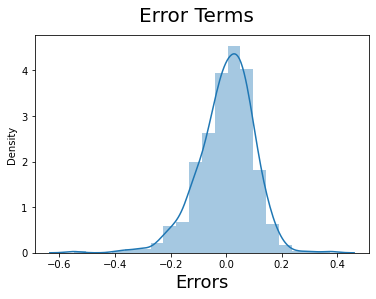

In [69]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

So, it is evident that error terms follow normal distribution with mean zero.

#### Making predictions

##### Applying scaling on the test sets

In [70]:
numeric_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])

#### Dividing test into X and Y sets

In [71]:
y_test = df_test.pop('cnt')
X_test = df_test

In [72]:
# Now let's use our final model to make predictions.

# Creating X_test_rfe dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

In [73]:
# Making predictions
y_pred = lm_rfe.predict(X_test_rfe)

### Model Evaluation

Text(0, 0.5, 'y_pred')

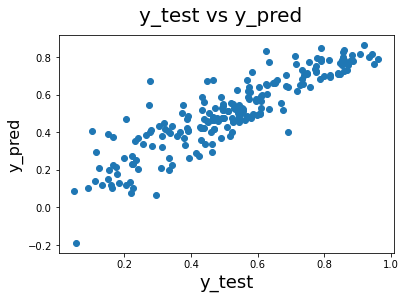

In [74]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7928771395602825

In [76]:
r2_score(y_train, y_train_cnt)

0.8032960488219767

#### Since the R squared values of trained and test data are almost similar, we can accept this model.

#### We can see that the equation of our best fitted line is:

#### cnt=(0.2455*yr)+(-0.0773*holiday)+(-0.1881*windspeed)+(-0.1895*spring)+(-0.0480*summer)+(-0.1295*dec)+(-0.1679*jan)+(-0.1094*nov)+(0.0616*sep)+(-0.3105*cloudy)+(-0.0840*misty)+(-0.1022*feb)+(0.0552*jun)+0.5800